In [3]:
import pandas_datareader as pdr

In [4]:
import pandas as pd
df = pd.read_csv('/content/mandir-marg, delhi, delhi, india-air-quality.csv')

In [5]:
df.head()

,date,pm25,pm10,o3,no2,so2,co
0,01-06-2021,106.0,83,14,30,4,8
1,02-06-2021,163.0,,,,,
2,01-05-2021,156.0,102,15,31,5,7
3,02-05-2021,146.0,155,12,29,4,7
4,03-05-2021,173.0,94,11,29,5,7


In [6]:
df.tail()

,date,pm25,pm10,o3,no2,so2,co
2610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2614,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df=df.dropna()

In [8]:
df1 = df.reset_index()

In [9]:
df1=df1[' pm25']

In [10]:
df1

0       106.0
1       163.0
2       156.0
3       146.0
4       173.0
        ...  
2521    151.0
2522    160.0
2523    149.0
2524    115.0
2525    128.0
Name:  pm25, Length: 2526, dtype: float64

In [11]:
df1.dropna()

0       106.0
1       163.0
2       156.0
3       146.0
4       173.0
        ...  
2521    151.0
2522    160.0
2523    149.0
2524    115.0
2525    128.0
Name:  pm25, Length: 2526, dtype: float64

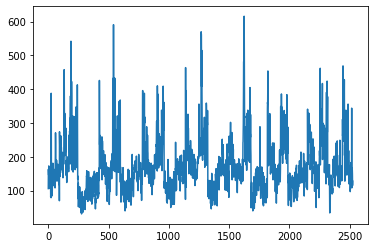

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
import numpy as np


In [35]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1 = scalar.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
df1

array([[0.12820513],
       [0.22564103],
       [0.21367521],
       ...,
       [0.2017094 ],
       [0.14358974],
       [0.16581197]])

In [16]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(1641, 885)

In [18]:
train_data

array([[0.12820513],
       [0.22564103],
       [0.21367521],
       ...,
       [0.34017094],
       [0.36923077],
       [0.40854701]])

In [19]:
test_data

array([[0.24786325],
       [0.28547009],
       [0.37264957],
       [0.23931624],
       [0.22393162],
       [0.22051282],
       [0.23418803],
       [0.37948718],
       [0.44957265],
       [0.50940171],
       [0.5008547 ],
       [0.37948718],
       [0.28034188],
       [0.33504274],
       [0.52478632],
       [0.5025641 ],
       [0.42051282],
       [0.41709402],
       [0.37777778],
       [0.33846154],
       [0.32820513],
       [0.34017094],
       [0.26837607],
       [0.27692308],
       [0.32478632],
       [0.36923077],
       [0.36239316],
       [0.43247863],
       [0.2974359 ],
       [0.26153846],
       [0.2957265 ],
       [0.56752137],
       [0.63931624],
       [0.42905983],
       [0.32649573],
       [0.40512821],
       [0.38803419],
       [0.5025641 ],
       [0.35555556],
       [0.32649573],
       [0.2957265 ],
       [0.07863248],
       [0.03076923],
       [0.13846154],
       [0.0957265 ],
       [0.12820513],
       [0.15897436],
       [0.071

In [20]:
import numpy

def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]

    dataX.append(a)
    dataY.append(dataset[i + time_step,0])

  return numpy.array(dataX),numpy.array(dataY)

In [21]:
time_step=100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [22]:
print(X_train.shape),print(y_train.shape)

(1540, 100)
(1540,)


(None, None)

In [23]:
print(X_test.shape),print(y_test.shape)

(784, 100)
(784,)


(None, None)

In [24]:
# reuired for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 11s 55ms/step - loss: 0.0188 - val_loss: 0.0117
Epoch 2/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0122 - val_loss: 0.0118
Epoch 3/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0113 - val_loss: 0.0101
Epoch 4/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0106 - val_loss: 0.0097
Epoch 5/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 6/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0098 - val_loss: 0.0094
Epoch 7/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 8/100
25/25 [==============================] - 0s 15ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch 9/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0093 - val_loss: 0.0098
Epoch 10/100
25/25 [==============================] - 0s 16ms/step - loss: 0.0091 - val_loss: 0.008

In [29]:
import tensorflow as tf

In [30]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [31]:
train_predict = scalar.inverse_transform(train_predict)
test_predict = scalar.inverse_transform(test_predict)

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

182.60223728459442

In [33]:
math.sqrt(mean_squared_error(y_test,test_predict))

187.16762565991797

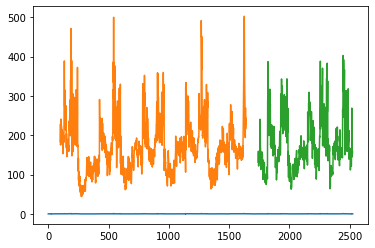

In [46]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

885

In [38]:
x_input=test_data[785:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.21880341880341878,
 0.24102564102564103,
 0.20512820512820515,
 0.23076923076923075,
 0.22051282051282053,
 0.21196581196581196,
 0.19999999999999998,
 0.1675213675213675,
 0.19829059829059828,
 0.18632478632478633,
 0.1794871794871795,
 0.24273504273504273,
 0.20683760683760685,
 0.1692307692307692,
 0.37606837606837606,
 0.47863247863247865,
 0.3948717948717949,
 0.411965811965812,
 0.6188034188034187,
 0.7487179487179487,
 0.5863247863247862,
 0.5008547008547009,
 0.47692307692307695,
 0.6820512820512821,
 0.6683760683760683,
 0.36752136752136755,
 0.4102564102564103,
 0.4632478632478633,
 0.523076923076923,
 0.6273504273504273,
 0.6786324786324786,
 0.505982905982906,
 0.29572649572649573,
 0.34871794871794876,
 0.1658119658119658,
 0.1692307692307692,
 0.17264957264957265,
 0.17777777777777778,
 0.35384615384615387,
 0.2923076923076923,
 0.3982905982905983,
 0.47692307692307695,
 0.452991452991453,
 0.5247863247863247,
 0.3931623931623932,
 0.2923076923076923,
 0.33162393162393

In [41]:
# prediction for the next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17842461]
101
1 day input [0.24102564 0.20512821 0.23076923 0.22051282 0.21196581 0.2
 0.16752137 0.1982906  0.18632479 0.17948718 0.24273504 0.20683761
 0.16923077 0.37606838 0.47863248 0.39487179 0.41196581 0.61880342
 0.74871795 0.58632479 0.5008547  0.47692308 0.68205128 0.66837607
 0.36752137 0.41025641 0.46324786 0.52307692 0.62735043 0.67863248
 0.50598291 0.2957265  0.34871795 0.16581197 0.16923077 0.17264957
 0.17777778 0.35384615 0.29230769 0.3982906  0.47692308 0.45299145
 0.52478632 0.39316239 0.29230769 0.33162393 0.27179487 0.28205128
 0.20512821 0.23076923 0.1965812  0.22222222 0.28376068 0.25811966
 0.29059829 0.21025641 0.34700855 0.25470085 0.40512821 0.36410256
 0.55555556 0.26324786 0.27008547 0.23247863 0.26153846 0.31965812
 0.16752137 0.15213675 0.22051282 0.21025641 0.18974359 0.21196581
 0.18290598 0.22222222 0.20512821 0.2        0.24444444 0.12991453
 0.11282051 0.12991453 0.15555556 0.2        0.24273504 0.23589744
 0.25982906 0.13846154 0.14529915 0.1829

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

2526

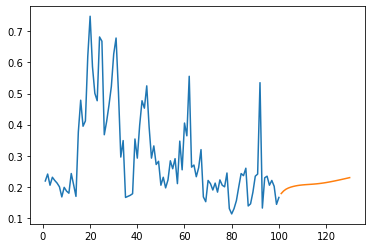

In [47]:
plt.plot(day_new,scalar.inverse_transform(df1[2426:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

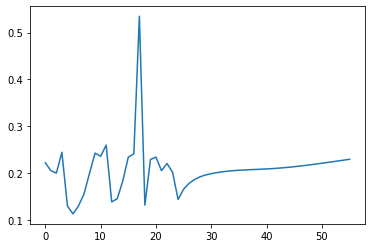

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2500:])

In [49]:
df3=scalar.inverse_transform(df3).tolist()

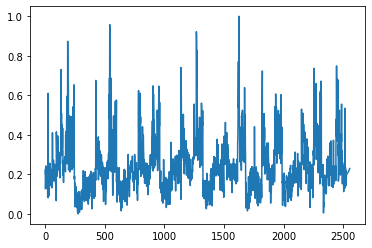

In [50]:
plt.plot(df3)